## Pydicom简介

Pydicom是一个用于处理DICOM格式文件的Python包，可以处理包括如医学图像（CT等）、报告等。

Pydicom支持DICOM格式的读取：可以将dicom文件读入python结构，同时支持修改后的数据集可以再次写入DICOM格式文件。但需要注意，它不是被设计为查看图像，主要是用来操作DICOM文件的各种数据元素。

pydicom安装非常方便，直接使用pip 即可安装

In [4]:
!pip install pydicom

## DICOM文件简介

### 医学影像
医学影像(Medical Imaging)，是指利用某种介质（例如X射线、电磁、超声波等等）与人体相互作用，从而以影像方
式将人体内部组织器官的结构和密度表现出来，然后提供给医生进行判断并对人体健康状况得出结论的一门科学。

### 医学仪器
医学影像仪器主要包含:

1, X光影像仪器

2, CT（Computerized Tomography Computed Tomography）

3, 超声（分B超、彩色多普勒超声、心脏彩超、三维彩超）

4, 核磁共振成像（MRI）

### DICOM
DICOM（医学数字成像和通讯），英文全称Digital Imaging and Communications in Medicine，是ACR（美国放射协会
和NAMA（美国国家电子制造商协会）联合开发医学数字成像和通讯的一个通用标准。随着X线断层造影技术和其他数字诊断模式的产生，
以及计算机的使用在临床应用中的增长，为实现在不同制造商生产的设备之间传输图像和联合信息的标准方法—DICOM标准，在1985年
应运而生并不断的改版升级，现在主要是3.0版本。对于医学专业的同学如要了解更多的相关背景知识，可以参考Dicom
官方文档。DICOM顾名思义，关键点在于D-igital I-maging和C-ommunications，
标准主要由三个部分组成:
```
a file format for images and reports
a set of defined services
a network protocol
```

### DICOM文件格式详解

Dicom全称是医学数字图像与通讯,文件后缀通常为*.dcm,DICOM文件是标记的图像文件，包含图像和有关图像的数据集合，其能够在两
个以DICOM格式接收患者数据和图像的实体之间进行交流。通俗的理解就是：患者的医学图像以DICOM文件格式进行存储，其中包含了图像 信息以及患者的PHI（protected health
information，即姓名、性别、年龄等），以及产生图像的设备的相关信息。
文件解析:整体结构先是128字节所谓的导言部分,然后是dataElement依次排列的方式 就是一个dataElement接一个dataElement的 方式排到文件结尾,其存储的信息为二进制格式。



DICOM文件头包含了标识数据集合的相关信息，每个DICOM文件都必须包含文件头，主要信息：
```
文件导言: 由128个字节组成，描述文件的相关导言信息。
DICOM前缀: 由4个字节组成，用于判断其字符串值是否为"DICOM"从而判断是否为DICOM文件，可以理解为一个标志信息。
文件元信息元素
```
DICOM数据集是DICOM文件的主要组成部分，其由DICOM数据元素按照指定的顺序排列。数据元素最基本的数据单元是数据元， 按照TAG从小到大顺序排列，即一个数据元表示一个TAG。数据元主要由4个部分组成：
```
TAG号: 由4个字节组成，包括2字节的组号和2字节的元素号（例如：0010 0040
表示患者性别，其中的组号：0002描述设备通讯信息、0008描述特征参数、0010描述患者信息、0028描述图像信息参数）。我们后期所需要的DICOM文件相关数据时，就是根据TAG来获取。
值表示（VR，value representation) 由两个字节的字符组成，存储描述该项数据元信息的数据类型，包含例如：LO（Long String，长字符串）、IS（Interger
String，整型字符串），DA（data，日期）等等共27种数据类型。
值长度（value length 存储描述该项信息的数据长度
值域（value) 存储描述该项信息的数据值
```

## 加载文件

In [1]:
import pydicom

In [2]:
info = {}
# 读取dicom文件
dcm = pydicom.read_file("data/1459541791.dcm")
dcm

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183901.792591'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance

In [13]:
dcm.PatientID

'10006'

## 图像读取

(5355, 4915)


Text(0.5, 1.0, 'UID:1.2.840.10009.1.2.3.10006.1.1459541791')

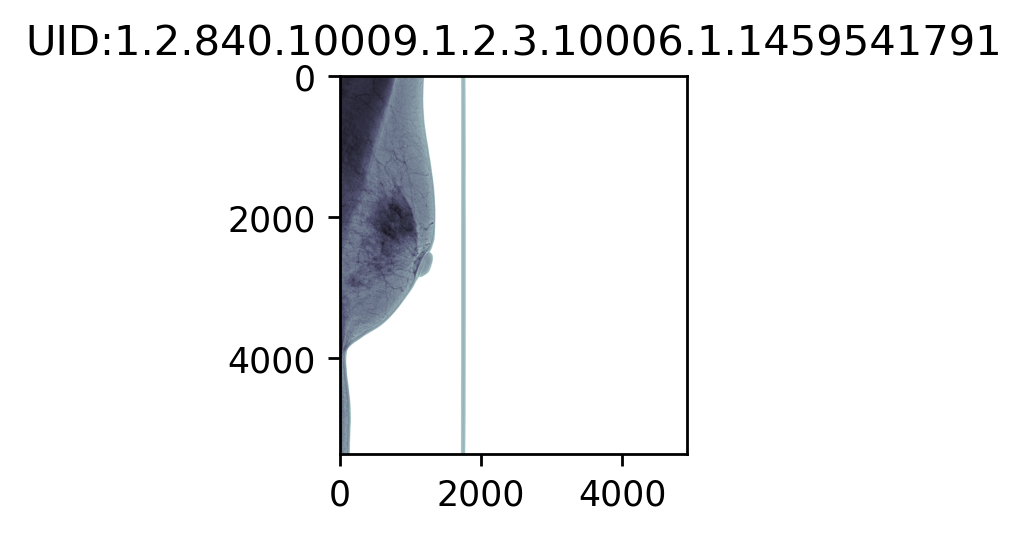

In [8]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# 读取dicom文件|
# 获取图像唯一标识符UID
uid = dcm.SOPInstanceUID
# 获取像素矩阵
img_arr = dcm.pixel_array
# 打印矩阵大小
print(img_arr.shape)
# 获取像素点个数
lens = img_arr.shape[0] * img_arr.shape[1]
# 获取像素点的最大值和最小值
arr_temp = np.reshape(img_arr, (lens,))
max_val = max(arr_temp)
min_val = min(arr_temp)
# 图像归一化
img_arr = (img_arr - min_val) / (max_val - min_val)
# 绘制图像并保存
plt.figure(figsize=(2, 2), dpi=250)  # 图像大小可以根据文件不同进行设置
plt.imshow(img_arr, cmap=plt.cm.bone)
plt.title(f"UID:{uid}")


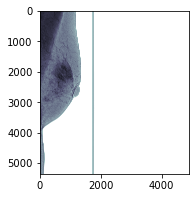

In [17]:
ds = pydicom.dcmread('data/1459541791.dcm')
plt.figure(figsize=(3, 3))
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()

CT扫描中的测量单位是Hounsfield单位（HU），它是辐射密度的量度。 CT扫描仪经过精心校准，可以精确测量, 默认情况下，从DICOM文件中获得的值是HU这个单位,还原需要乘以重新缩放斜率并添加截距

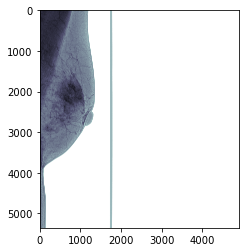

In [19]:
def rescale_img_to_hu(dcm_ds):
    """Rescales the image to Hounsfield unit."""
    return dcm_ds.pixel_array * dcm_ds.RescaleSlope + dcm_ds.RescaleIntercept

ds = pydicom.dcmread('data/1459541791.dcm')
plt.imshow(rescale_img_to_hu(ds), cmap="bone")
plt.show()

## 参考资料

- https://zhuanlan.zhihu.com/p/59413289
- PyDicom https://www.cnblogs.com/yunhgu/p/15921517.html